# Bayesian decision theory

Florent Leclercq,<br/>
Imperial Centre for Inference and Cosmology, Imperial College London,<br/>
florent.leclercq@polytechnique.org

**Formalism introduced in Leclercq et al. 2015b, arXiv:1503.00730**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Load the structure type maps

In [2]:
#data available at this address: http://icg.port.ac.uk/~leclercq/data/borg_sdss_tweb.tar.gz 
tweb = np.load("data/borg_sdss_tweb.npz")

#Minimum and maximum position along the x-axis in Mpc/h
xmin=tweb['ranges'][0]
xmax=tweb['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=tweb['ranges'][2]
ymax=tweb['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=tweb['ranges'][4]
zmax=tweb['ranges'][5]

#3D probabilistic maps for T-web structures
Posterior_l0=tweb['voids']
Posterior_l1=tweb['sheets']
Posterior_l2=tweb['filaments']
Posterior_l3=tweb['clusters']

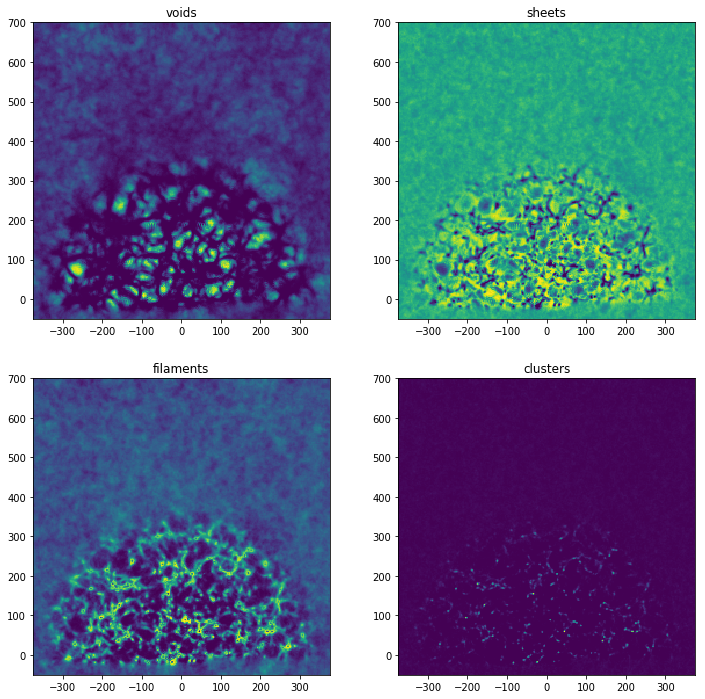

In [3]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='row', sharey='col', figsize=(12,12))
ax1.imshow(Posterior_l0[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="viridis")
ax1.set_title("voids")
ax2.imshow(Posterior_l1[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="viridis")
ax2.set_title("sheets")
ax3.imshow(Posterior_l2[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="viridis")
ax3.set_title("filaments")
ax4.imshow(Posterior_l3[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="viridis")
ax4.set_title("clusters")
plt.show()

## Optimal decision-making 

In [4]:
#Prior probabilities (numbers given in table II in Leclercq et al. 2015a, arXiv:1502.02690)
Prior_l0 = 0.14261
Prior_l1 = 0.59561
Prior_l2 = 0.24980
Prior_l3 = 0.01198

In [5]:
#Decision theory framework introduced in Leclercq et al. (2015b)
alpha = 1.5	# The free parameter here corresponding to the "cost of the game"

G_a0l0 = 1./Prior_l0-alpha
G_awl0 = -alpha
G_a4l0 = 0.

G_a1l1 = 1./Prior_l1-alpha
G_awl1 = -alpha
G_a4l1 = 0.

G_a2l2 = 1./Prior_l2-alpha
G_awl2 = -alpha
G_a4l2 = 0.

G_a3l3 = 1./Prior_l3-alpha
G_awl3 = -alpha
G_a4l3 = 0.

# define the utility functions
U_a0 = G_a0l0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a1 = G_awl0*Posterior_l0 + G_a1l1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a2 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_a2l2*Posterior_l2 + G_awl3*Posterior_l3
U_a3 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl3*Posterior_l2 + G_a3l3*Posterior_l3
U_a4 = G_a4l0*Posterior_l0 + G_a4l1*Posterior_l1 + G_a4l2*Posterior_l2 + G_a4l3*Posterior_l3

# make the decision maximizing the utility function
MAP = np.copy(U_a4)
MAP[np.where((U_a0>U_a1) * (U_a0>U_a2) * (U_a0>U_a3) * (U_a0>U_a4))] = 0.; #voids
MAP[np.where((U_a1>U_a0) * (U_a1>U_a2) * (U_a1>U_a3) * (U_a1>U_a4))] = 1.; #sheets
MAP[np.where((U_a2>U_a0) * (U_a2>U_a1) * (U_a2>U_a3) * (U_a2>U_a4))] = 2.; #filaments
MAP[np.where((U_a3>U_a0) * (U_a3>U_a1) * (U_a3>U_a2) * (U_a3>U_a4))] = 3.; #clusters
MAP[np.where((U_a4>=U_a0) * (U_a4>=U_a1) * (U_a4>=U_a2) * (U_a4>=U_a3))] = -1.; #undecided

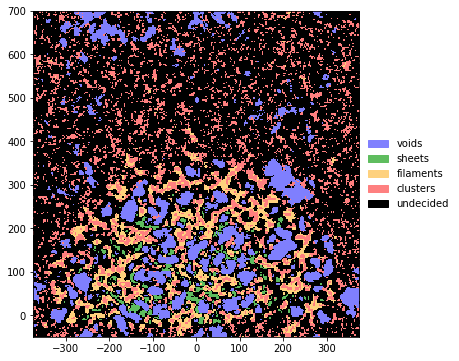

In [6]:
#Now make a example plot
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
void_blue = (128./256,128./256,255./256,1.)
sheet_green = (95./256,190./256,95./256,1.)
filament_yellow = (255./256,210./256,126./256,1.)
cluster_red = (255./256,128./256,128./256,1.)
StructuresMap=ListedColormap(['black',void_blue,sheet_green,filament_yellow,cluster_red])
plt.figure(figsize=(6,6))
plt.imshow(MAP[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap=StructuresMap)
u_patch = mpatches.Patch(color='black', label='undecided')
v_patch = mpatches.Patch(color=void_blue, label='voids')
s_patch = mpatches.Patch(color=sheet_green, label='sheets')
f_patch = mpatches.Patch(color=filament_yellow, label='filaments')
c_patch = mpatches.Patch(color=cluster_red, label='clusters')
handles = [v_patch,s_patch,f_patch,c_patch,u_patch]
plt.legend(handles=handles,frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()